In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Given the function:

\begin{equation}
f(x)=5x^3 \cdotp sin(x)
\end{equation}

Find the global minima of the function.

Analytically using the product rule:
\begin{align*}
f(uv)=uv \\
f'(uv) = u d(v) + v(du)
\end{align*}

\begin{align*}
f(x)=5x^3 \cdotp sin(x) \\
f'(x) = 5x^3 \cdotp \frac{d(sin(x))}{d{x}} + sin(x) \cdotp \frac{5x^3}{d(x)} \\
f'(x) = 5x^3 \cdotp cos(x) + sin(x) \cdotp 15x^2
\end{align*}

setting $f'(x) = 0$

\begin{align*}
f'(x) = 5x^3 \cdotp cos(x) + sin(x) \cdotp 15x^2 \\
0 = 5x^3 \cdotp cos(x) + sin(x) \cdotp 15x^2 \\
5x^3 \cdotp cos(x)=sin(x) \cdotp 15x^2 \\
\frac{x^3}{x^2} =\frac{sin(x)}{cos(x)} \frac{15}{5} \\
x = tan(x)\cdot 3 \\
x = 3 \cdotp tan(x)
\end{align*}

In [2]:
# function (as a function)
def f(x):
  return (5*x**3)*(np.sin(x))

# derivative function
def df(x):
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))

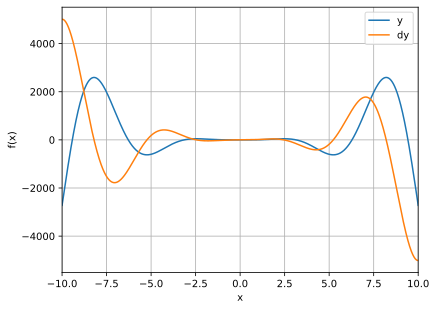

In [3]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-10,10,2001)

# plotting
plt.plot(x,f(x), x,df(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T/ipykernel_2050/3735517812.py:7: RuntimeWarning: overflow encountered in power
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T/ipykernel_2050/3735517812.py:7: RuntimeWarning: overflow encountered in square
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T/ipykernel_2050/3735517812.py:7: RuntimeWarning: invalid value encountered in add
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T/ipykernel_2050/3735517812.py:7: RuntimeWarning: invalid value encountered in cos
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T/ipykernel_2050/3735517812.py:7: RuntimeWarning: invalid value encountered in sin
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))


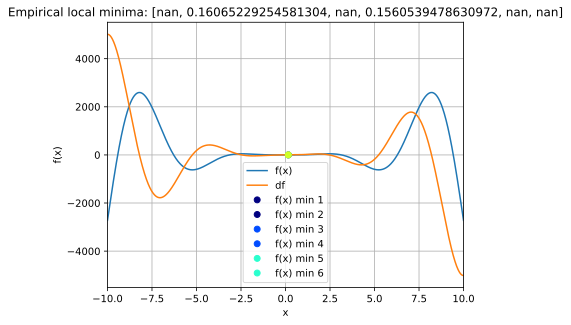

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define your functions here (assuming f(x) and df(x) are already defined)

# Number of random starting points
n_starting_points = 6

# learning parameters
learning_rate = 0.01
training_epochs = 100

# Create an array to hold the local minima for each starting point
localmins = []

# List of colors
colors = plt.cm.jet(np.linspace(0, 1, n_starting_points))

# Gradient Descent for each starting point
for idx in range(n_starting_points):
    # random starting point
    localmin = np.random.choice(x, 1)
    
    for i in range(training_epochs):
        grad = df(localmin)
        localmin = localmin - learning_rate * grad
    
    # Store the local minimum found
    localmins.append(localmin[0])

# plot the results
plt.plot(x, f(x), x, df(x))

# Plot each found local minimum with a different color
for idx, localmin in enumerate(localmins):
    plt.plot(localmin, df(localmin), 'o', color=colors[idx], label=f'Min {idx + 1}')
    plt.plot(localmin, f(localmin), 'o', color=colors[idx])

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df'] + [f'f(x) min {i + 1}' for i in range(n_starting_points)])
plt.title(f'Empirical local minima: {localmins}')
plt.show()


/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T/ipykernel_2050/3735517812.py:7: RuntimeWarning: overflow encountered in power
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T/ipykernel_2050/3735517812.py:7: RuntimeWarning: overflow encountered in square
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/var/folders/nv/sjj_9gb52674c8ktybqghkm80000gq/T/ipykernel_2050/3735517812.py:7: RuntimeWarning: invalid value encountered in add
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))


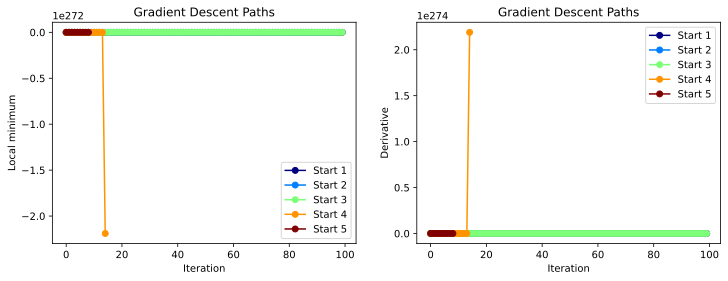

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define your functions here (assuming f(x) and df(x) are already defined)

# Number of random starting points
n_starting_points = 5

# learning parameters
learning_rate = 0.01
training_epochs = 100

# List of colors
colors = plt.cm.jet(np.linspace(0, 1, n_starting_points))

# Create an array to store model parameters for each starting point
all_modelparams = np.zeros((n_starting_points, training_epochs, 2))

# Gradient Descent for each starting point
for idx in range(n_starting_points):
    # random starting point
    localmin = np.random.choice(x, 1)
    
    for i in range(training_epochs):
        grad = df(localmin)
        localmin = localmin - learning_rate * grad
        all_modelparams[idx, i, 0] = localmin
        all_modelparams[idx, i, 1] = grad

# Plot the gradient over iterations for each starting point
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for idx in range(n_starting_points):
    for i in range(2):
        ax[i].plot(all_modelparams[idx, :, i], 'o-', color=colors[idx], label=f'Start {idx + 1}')
        ax[i].set_xlabel('Iteration')
        ax[i].set_title(f'Gradient Descent Paths')
    
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

ax[0].legend()
ax[1].legend()

plt.show()


In [6]:
localmin

array([nan])

# Exercises

Task:

- Experiment with the values of the learning rate and graph the plot of the local minimum. Describe the result as the value of the learning rate increases.
- Find a random value of the treshold and modify the gradient descent code to include early stopping.